In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
POPS = [   "ESN", "GWD", "LWK", "MSL", "YRI", \
           "ACB", "ASW", \
           "CLM", "MXL", "PEL", "PUR", \
           "CDX", "CHB", "CHS", "JPT", "KHV", \
           "CEU", "FIN", "GBR", "IBS", "TSI", \
           "BEB", "GIH", "ITU", "PJL", "STU"]

In [16]:
df = pd.DataFrame(columns = POPS)
addr = "/gymreklab-tscc/helia/ensembl/experiments/stats/files"
for pop in POPS:
    var_data_whole = pd.DataFrame(columns = ['Sample', 'ref', 'non_ref'])
    for chromosome in range(1,23):
        var_data = pd.read_csv(f"{addr}/{pop}_{chromosome}.txt", delimiter="\t", header=None)
        var_data.columns = ['Sample', 'ref_chr', 'non_ref_chr']
        if len(var_data_whole) == 0:
            var_data_whole = var_data.copy()
            var_data_whole.columns = ['Sample', 'ref', 'non_ref']
        else:
            var_data_whole = pd.merge(var_data_whole,var_data, on = "Sample")
            var_data_whole['ref'] = var_data_whole['ref'] + var_data_whole['ref_chr']
            var_data_whole['non_ref'] = var_data_whole['non_ref'] + var_data_whole['non_ref_chr']
            var_data_whole = var_data_whole.drop(columns = ['ref_chr', 'non_ref_chr'])
        df[pop] = var_data_whole['non_ref'] / (var_data_whole['ref'] + var_data_whole['non_ref'])


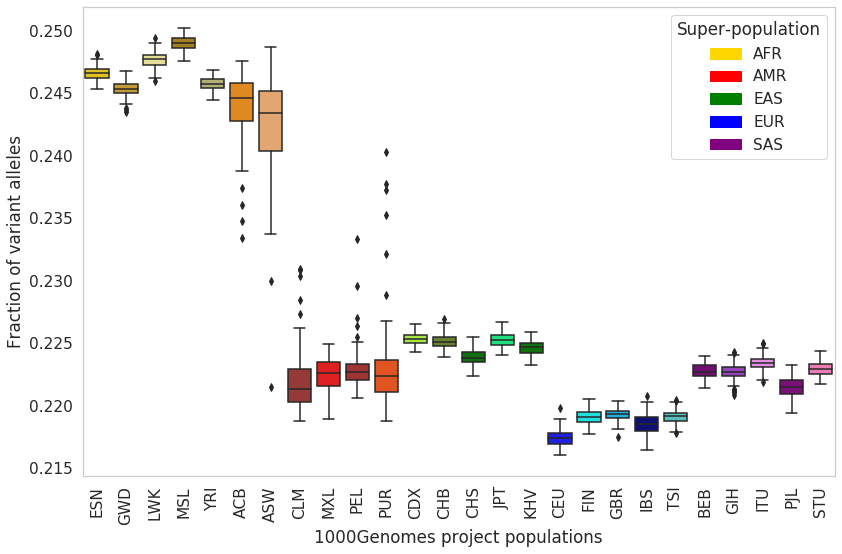

In [27]:
colors = ["gold", "goldenrod", "khaki", "darkgoldenrod","darkkhaki", "darkorange", "sandybrown", "brown","red","firebrick","orangered","greenyellow","olivedrab","green","springgreen","green","blue","aqua","deepskyblue","navy","mediumturquoise","purple","darkorchid","violet","darkmagenta","hotpink" ]
color_dict = dict(zip(POPS, colors))
sns.set(rc={'figure.figsize':(12,8)},font_scale = 1.4)
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.boxplot(data=df, palette=color_dict)
ax.set(xlabel='1000Genomes project populations', ylabel='Fraction of variant alleles')


popcolors = {}
popcolors["AFR"] = "gold"
popcolors["AMR"] = "red"
popcolors["EAS"] = "green"
popcolors["EUR"] = "blue"
popcolors["SAS"] = "purple"

patches = []
for pop in popcolors:
    patches.append(mpatches.Patch(color=popcolors[pop], label=pop))

plt.legend(handles=patches,loc='upper right', title="Super-population")

plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("variants.png", dpi=1200)

